## based on data do analysis and see on what criteria's person survivied or NOT survived

In [183]:
import pandas as pd
import numpy as np

In [184]:
path = "/home/sejal/Documents/datascience/dataset/data/train.csv"

In [185]:
df = pd.read_csv(path)

In [186]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [188]:
df.shape

(891, 12)

In [189]:
df.info()

# we see age cabin and embarked cols where data is missing. Problemratic going forward

# Need to think what an we do with it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [190]:
df.describe()

#below 7 are numericals, SO other 5 are strings/non-numericals

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [191]:
df.describe(include=["O"])
#include only variables with datatype as Object



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [192]:
df.describe(include="all")
#includes everything

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [193]:
df.describe(percentiles=[0.01,0.02,0.25,0.50,0.75,0.95,0.99])


#99% age is 65.xx and 100th % age is 80.xx huge diffrenct in one percent increase, so seems to outliers. 
#Same is case with fare as well. Fare almost doubles

#Survived is categorical (either 0 or 1), numeric makes no sense to us CATEGORICAL VARIABLE

#PClass is CATEGORICAL as well


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
1%,9.900000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2%,18.800000,0.000000,1.000000,2.000000,0.000000,0.000000,6.397500
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150


In [194]:
#make a list of numerica columns
#make a list of categorical cols

df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [195]:
numeric_list = ["Age","SibSp","Parch","Fare"]
cat_list = ["Pclass","Sex","Embarked"]
target = "Survived"

In [196]:
#code for numeric variables plot 3 graph in 1 row
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

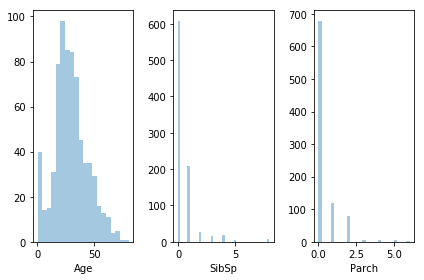

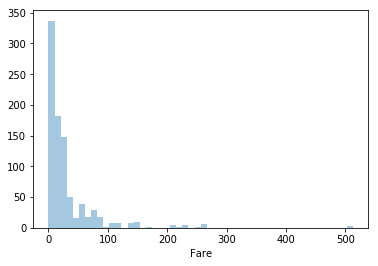

In [197]:
#df[numeric_list].fillna(0)
for i in range(0, len(numeric_list), 3):
    if len(numeric_list) > i+1:
       # plt.figure(figsize=(3,3))

        plt.subplot(131)
        sns.distplot(df[numeric_list[i]].dropna(), kde=False)

        plt.subplot(132)            
        sns.distplot(df[numeric_list[i+1]].dropna(), kde=False)

        plt.subplot(133)            
        sns.distplot(df[numeric_list[i+2]].dropna(), kde=False)

        plt.tight_layout()
        plt.show()
    else:
        sns.distplot(df[numeric_list[i]].dropna(), kde=False)
        plt.show()
    

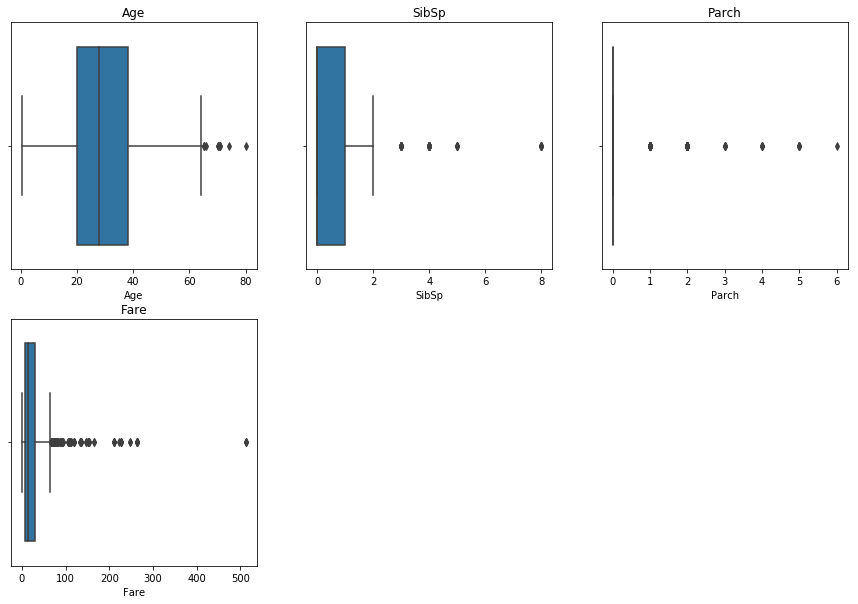

In [198]:
'''num_cols = 2
plt.figure(figsize=(10, 15))
for i in range (0, len(numeric_list)):
    plt.subplot( int(len(numeric_list)/num_cols)+1, num_cols, i+1)
    sns.distplot(df[numeric_list[i]].dropna(), kde=False) 
'''
num_cols = 3
num_rows = int(len(numeric_list)/num_cols)+1

plt.figure(figsize=( 5*num_cols, 5*num_rows))
for i in range (0, len(numeric_list)):
    plt.subplot( num_rows, num_cols, i+1)
    plt.title(numeric_list[i])
#    sns.distplot(df[numeric_list[i]].dropna(), kde=False)   
    sns.boxplot(df[numeric_list[i]].dropna()) 

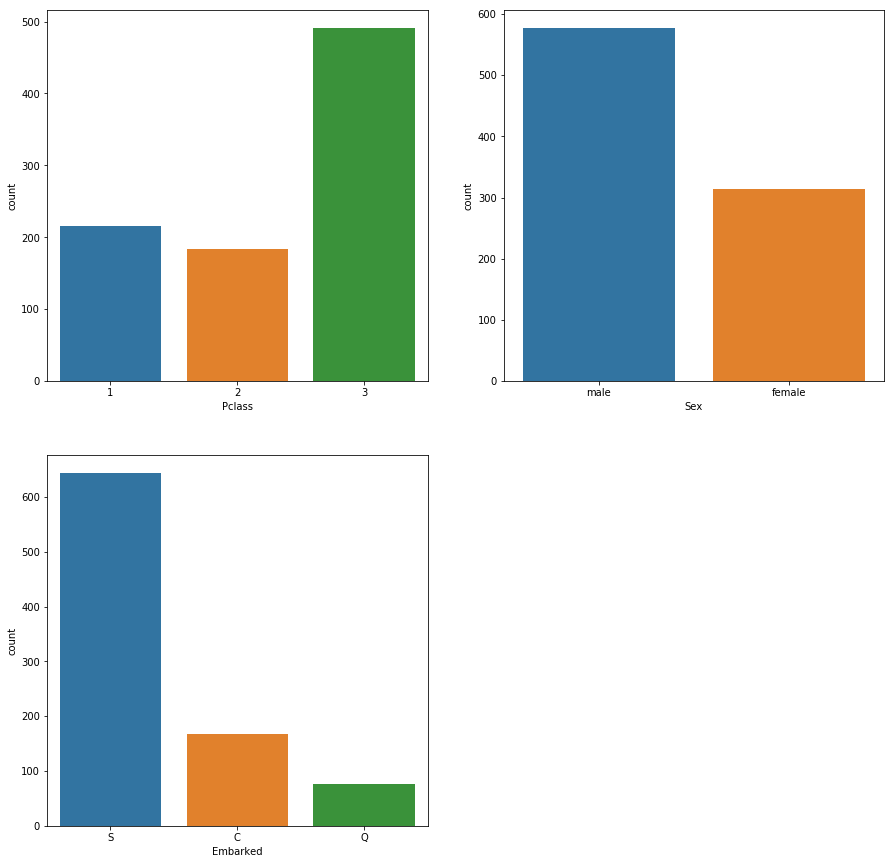

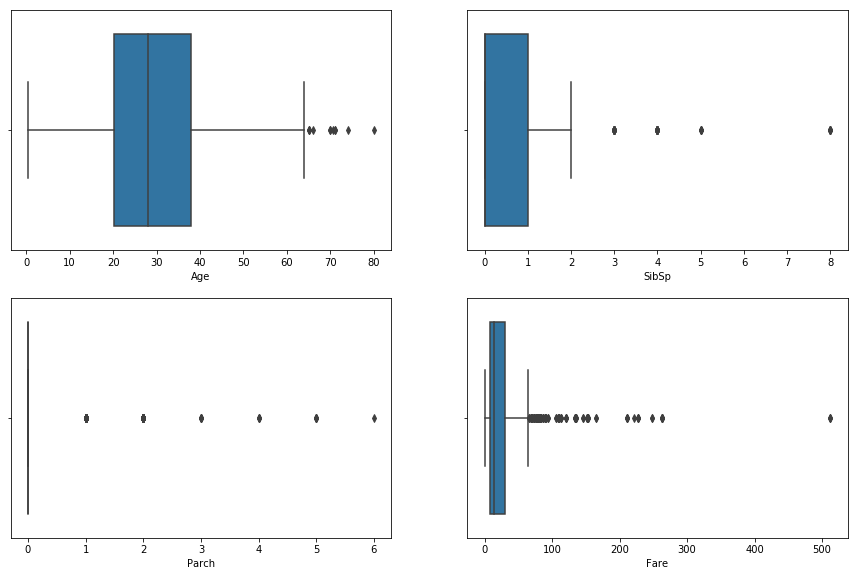

In [200]:
def num_univariable_eda(df,num_col_names,num_cols=3,figsize=None, savefig=False):
    plt.figure(figsize=figsize)
    for i in range(0, len(num_col_names)):        
        num_rows = int(len(num_col_names)/num_cols)+1                
        plt.subplot( num_rows, num_cols, i+1)
        sns.boxplot(df[num_col_names[i]])
    if savefig:
        plt.savefig('/home/sejal/Documents/datascience/python/graphDocs/num_eda', format='png')

#num_univariable_eda(df,numeric_list,3,(8,8), True)

def cat_univariable_eda(df,cat_col_names,num_cols=3,figsize=None, savefig=False):
    plt.figure(figsize=figsize)
    for i in range(0, len(cat_col_names)):        
        num_rows = int(len(cat_col_names)/num_cols)+1                
        plt.subplot( num_rows, num_cols, i+1)
        sns.countplot(df[cat_col_names[i]])
        if savefig:
            plt.savefig('/home/sejal/Documents/datascience/python/graphDocs/cat_eda', format='png')

#cat_univariable_eda(df,cat_list,2,(10,12), True)

def global_eds(df, cat_list=None, num_list=None, num_cols=3, figsize=None, savefig=False):
    if cat_list != None:
        cat_univariable_eda(df,cat_list,num_cols,figsize,savefig)        
    if num_list != None:
        num_univariable_eda(df,num_list,num_cols,figsize,savefig)
        
global_eds(df, cat_list, numeric_list, 2, (15,15), True)

In [215]:
#given dataframe, return all list of cat variable / numeric / other

def get_variables_from_df(df):
   ''' for col_names in df.columns.values:
        if df[col_names].dtype.find():'''
        
        
    
get_variables_from_df(df)

## function to get info describe of DF



## Multivariant
Categorical vs Categorical

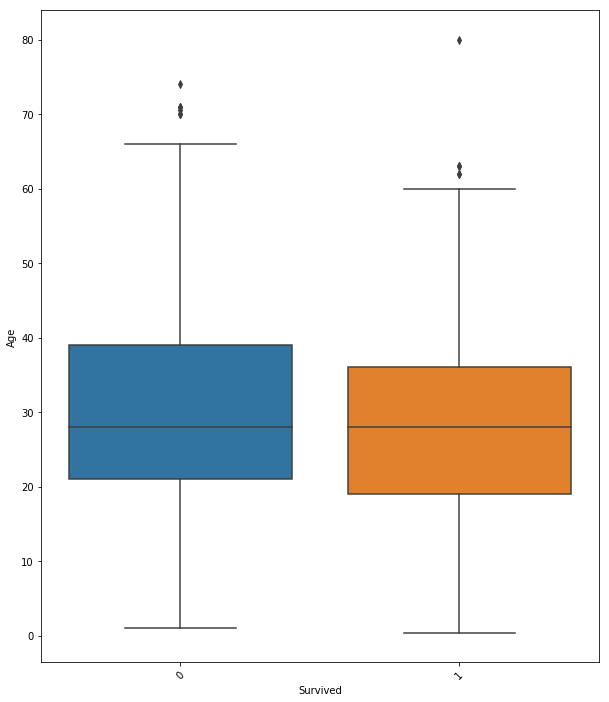

In [233]:
# create box plot for Survived versus Age
plt.figure(figsize=(10,12))
plt.xticks(rotation = 45)
sns.boxplot('Survived', 'Age', data=df)

## Multivariant
#Categorical vs Numeric

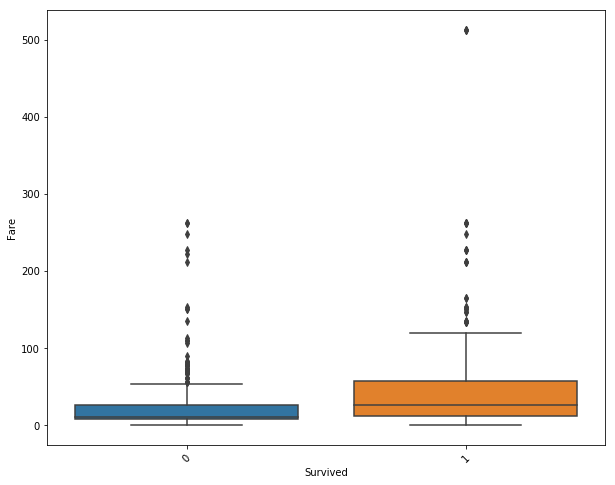

In [232]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 45)
sns.boxplot('Survived', 'Fare', data=df)

## Multivariant
#Numeric vs Numeric

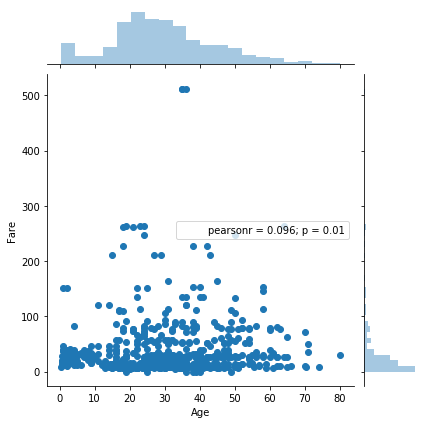

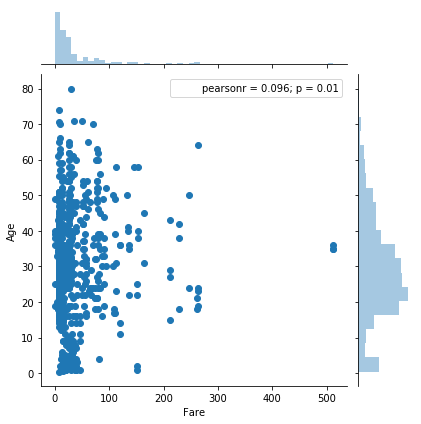

In [240]:
sns.jointplot('Age', 'Fare', data=df)
sns.jointplot( df.Fare, df.Age)


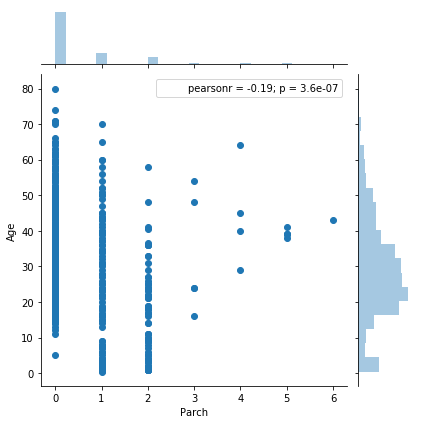

In [243]:
sns.jointplot( df.Parch, df.Age)

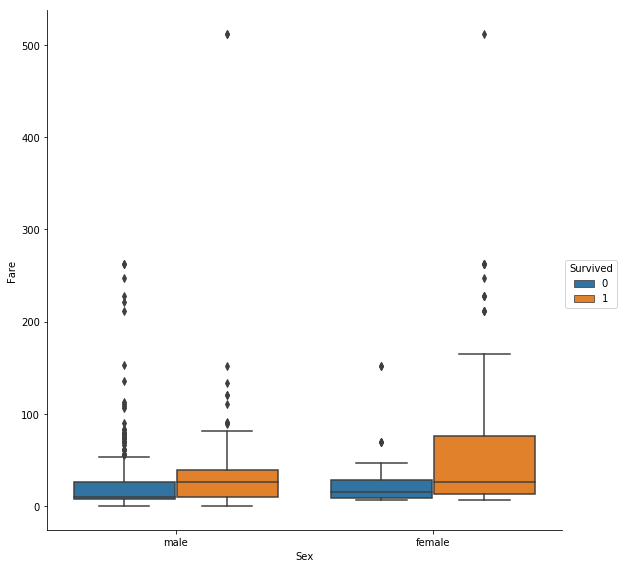

In [269]:
# Fare x Sex x Survival
sns.factorplot(y="Fare",x="Sex",hue="Survived", kind="box", size=8, aspect=1, data=df)

In [277]:
crosstab = pd.crosstab(index=df["Survived"], columns=(df.Pclass, df.Sex))
crosstab

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d102825d0>,
      dtype=object)

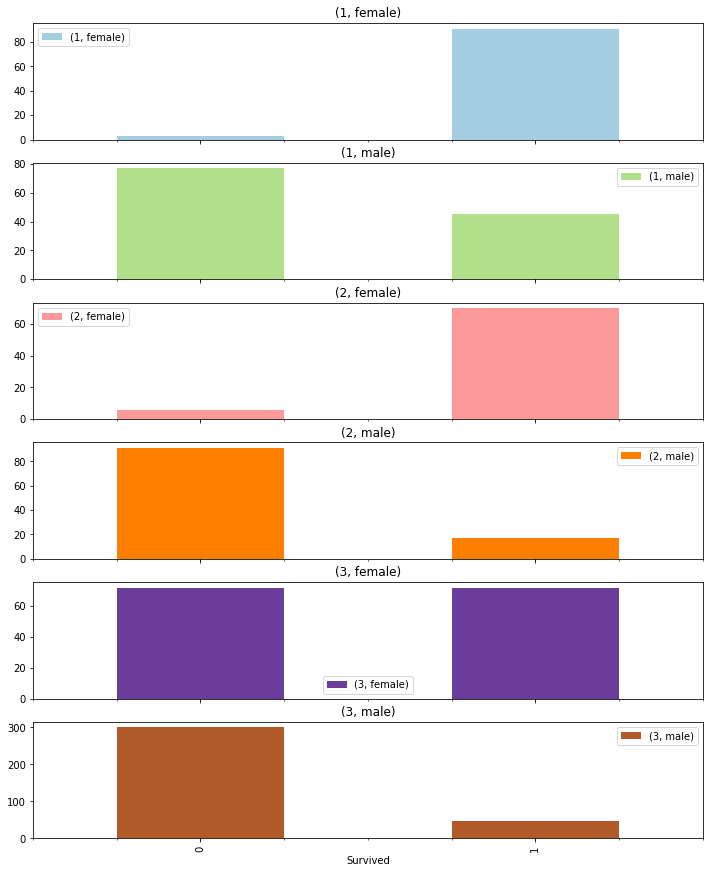

In [276]:
crosstab.plot(kind="bar", figsize=(12,15), stacked=True, colormap='Paired', subplots=True)

## function to draw plots, when col names are passedn